In [45]:
import pandas as pd
import numpy as np
import os


In [46]:
import pandas as pd
import numpy as np
import os

# Utility to save dataset to CSV
def save_dataset(df, name):
    os.makedirs("db", exist_ok=True)
    df.to_csv(f"db/{name}.csv", index=False)

# Dataset generators with integer-only values

def generate_balanced_dataset(seed=0):
    """
    Balanced: mixed short and long processes, random integer arrival times,
    mixed priorities, integer burst times.
    """
    np.random.seed(seed)
    return pd.DataFrame({
        'process_id': np.arange(1, 2501),
        'arrival_time': np.random.randint(0, 101, 2500),  # 0 to 100
        'priority': np.random.randint(1, 11, 2500),       # 1 to 10
        'burst_time': np.random.randint(1, 21, 2500)       # 1 to 20
    })


def generate_heavy_load_dataset(seed=1):
    """
    Heavy Load: many processes at time 0 or 1, integer burst times
    similar around mid-range.
    """
    np.random.seed(seed)
    return pd.DataFrame({
        'process_id': np.arange(1, 2501),
        'arrival_time': np.random.choice([0, 1], size=2500, p=[0.7, 0.3]),
        'priority': np.random.randint(1, 11, 2500),
        'burst_time': np.random.randint(8, 13, 2500)      # similar burst times 8-12
    })


def generate_burst_dominant_dataset(seed=2):
    """
    Burst Dominant: many short processes (1-3), few long ones (20-40), integer arrival times.
    """
    np.random.seed(seed)
    short = np.random.randint(1, 4, 2400)
    long = np.random.randint(20, 41, 100)
    burst_times = np.concatenate([short, long])
    np.random.shuffle(burst_times)
    return pd.DataFrame({
        'process_id': np.arange(1, 2501),
        'arrival_time': np.random.randint(0, 101, 2500),
        'priority': np.random.randint(1, 11, 2500),
        'burst_time': burst_times
    })


def generate_priority_heavy_dataset(seed=3):
    """
    Priority Heavy: processes mostly differing in priorities,
    integer arrival and burst times.
    """
    np.random.seed(seed)
    return pd.DataFrame({
        'process_id': np.arange(1, 2501),
        'arrival_time': np.random.randint(0, 101, 2500),
        'priority': np.random.choice([1,2,3,4,5], size=2500, p=[0.1,0.15,0.25,0.3,0.2]),
        'burst_time': np.random.randint(1, 21, 2500)
    })


def generate_preemption_strength_dataset(seed=4):
    """
    Preemption Strength: many long low-priority jobs and a few
    high-priority short jobs arriving later to showcase preemptive gain.
    """
    np.random.seed(seed)
    # Long, low-priority jobs
    long_jobs = pd.DataFrame({
        'process_id': np.arange(1, 2401),
        'arrival_time': np.random.randint(0, 50, 2400),
        'priority': np.full(2400, 10),
        'burst_time': np.random.randint(50, 101, 2400)
    })
    # Short, high-priority jobs
    short_jobs = pd.DataFrame({
        'process_id': np.arange(2401, 2501),
        'arrival_time': np.random.randint(25, 75, 100),
        'priority': np.full(100, 1),
        'burst_time': np.random.randint(1, 6, 100)
    })
    df = pd.concat([long_jobs, short_jobs], ignore_index=True)
    return df.sample(frac=1, random_state=seed).reset_index(drop=True)


def generate_preemption_weakness_dataset(seed=5):
    """
    Preemption Weakness: many small jobs with random priorities,
    causing frequent but low-benefit preemptions.
    """
    np.random.seed(seed)
    return pd.DataFrame({
        'process_id': np.arange(1, 2501),
        'arrival_time': np.random.randint(0, 101, 2500),
        'priority': np.random.randint(1, 11, 2500),
        'burst_time': np.random.randint(1, 6, 2500)
    })


if __name__ == "__main__":
    save_dataset(generate_balanced_dataset(), "balanced_dataset")
    save_dataset(generate_heavy_load_dataset(), "heavy_load_dataset")
    save_dataset(generate_burst_dominant_dataset(), "burst_dominant_dataset")
    save_dataset(generate_priority_heavy_dataset(), "priority_heavy_dataset")
    save_dataset(generate_preemption_strength_dataset(), "preemption_strength_dataset")
    save_dataset(generate_preemption_weakness_dataset(), "preemption_weakness_dataset")

FCFS algorithm results:
Throughput = 86.4692
CPU utilization = 0.90
Average waiting time = 12.8614
Average turn around time = 12.8718
Average response time = 12.8614 

=== FCFS ===
Number of processes   = 2500
Throughput            = 86.4692
CPU utilization       = 0.90
Average waiting time  = 12.8614
Average turnaround    = 12.8718
Average response time = 12.8614

SJF non preemptive algorithm results:
Throughput = 96.3011
CPU utilization = 0.9999984582200767
Average waiting time = 8.752138
Average turn around time = 8.762522
Average response time = 8.752138

=== SJF_NonPreemptive ===
Number of processes   = 2500
Throughput            = 96.3011
CPU utilization       = 1.00
Average waiting time  = 8.7521
Average turnaround    = 8.7625
Average response time = 8.7521

Priority non preemptive algorithm results: 
Throughput = 96.3011
CPU utilization = 0.9999984582200767
Average waiting time = 12.54
Average turn around time = 12.55
Average response time = 12.54

=== Priority_NonPreemptive ==

KeyboardInterrupt: 

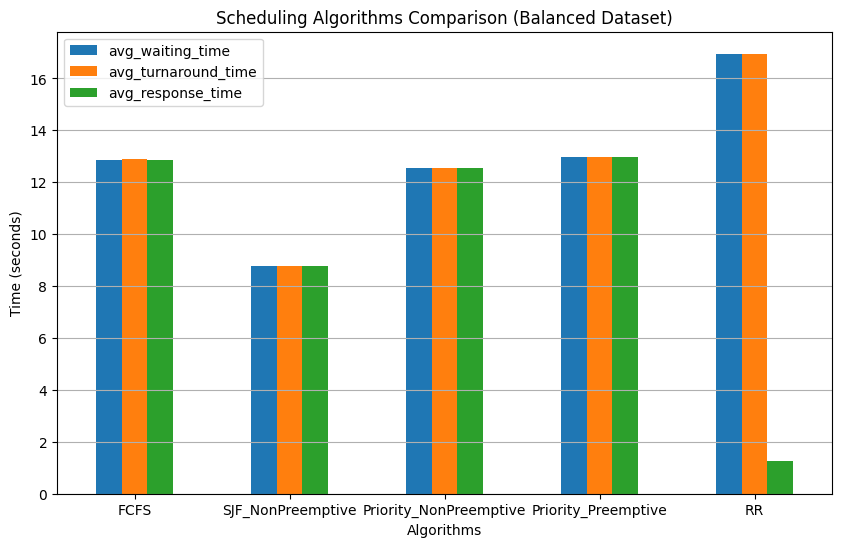

In [47]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Add algorithm directories to path
sys.path.append(os.path.relpath("First-Come-First-Serve-scheduling"))
sys.path.append(os.path.relpath("Priority-Scheduling"))
sys.path.append(os.path.relpath("Round-Robin-scheduling"))
sys.path.append(os.path.relpath("Shortest-Job-First-scheduling"))

# Import scheduling functions
from FCFS import simulate_fcfs_algorithm
from RR import simulate_rr_algorithm
from SJF_np import simulate_sjf_np_algorithm
from priority_np import simulate_priority_np_algorithm
from priority_p import simulate_priority_p_algorithm


def main():
    # Load dataset
    try:
        csv_path = os.path.join(os.path.dirname(__file__), "db", "balanced_dataset.csv")
    except NameError:
        csv_path = os.path.join(os.getcwd(), "db", "balanced_dataset.csv")

    try:
        data = pd.read_csv(csv_path)
    except FileNotFoundError:
        print(f"❌ CSV file not found at {csv_path}")
        return

    # Prepare storage for metrics
    awt_arr, att_arr, art_arr = [], [], []
    results = {}

    # Define algorithms to run
    algos = [
        ("FCFS", simulate_fcfs_algorithm),
        ("SJF_NonPreemptive", simulate_sjf_np_algorithm),
        ("Priority_NonPreemptive", simulate_priority_np_algorithm),
        ("Priority_Preemptive", simulate_priority_p_algorithm),
        ("RR", simulate_rr_algorithm)
    ]

    # Run each algorithm and collect results
    for name, func in algos:
        if name == "RR":
            result = func(data, 1)  # time quantum = 1
        else:
            result = func(data)
        results[name] = result
        awt_arr.append(float(result['awt']))
        att_arr.append(float(result['att']))
        art_arr.append(float(result['art']))

        # Print detailed results
        print(f"=== {name} ===")
        print(f"Number of processes   = {result['n']}")
        print(f"Throughput            = {result['throughput']}")
        print(f"CPU utilization       = {result['cpu_util']}")
        print(f"Average waiting time  = {result['awt']}")
        print(f"Average turnaround    = {result['att']}")
        print(f"Average response time = {result['art']}\n")

    # Create summary DataFrame
    df = pd.DataFrame(
        {
            'avg_waiting_time':    awt_arr,
            'avg_turnaround_time': att_arr,
            'avg_response_time':   art_arr
        },
        index=[name for name, _ in algos]
    )

    # Display summary
    print("=== Summary DataFrame ===")
    print(df)

    # Plot bar chart
    df.plot.bar(rot=0, figsize=(10, 6))
    plt.title('Scheduling Algorithms Comparison (Balanced Dataset)')
    plt.xlabel('Algorithms')
    plt.ylabel('Time (seconds)')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

FCFS algorithm results:
Throughput = 239.7743
CPU utilization = 0.75
Average waiting time = 3.8544
Average turn around time = 3.8576
Average response time = 3.8544 

=== FCFS ===
Number of processes   = 2500
Throughput            = 239.7743
CPU utilization       = 0.75
Average waiting time  = 3.8544
Average turnaround    = 3.8576
Average response time = 3.8544

SJF non preemptive algorithm results:
Throughput = 318.7174
CPU utilization = 0.9999948973343675
Average waiting time = 2.022751
Average turn around time = 2.025888
Average response time = 2.022751

=== SJF_NonPreemptive ===
Number of processes   = 2500
Throughput            = 318.7174
CPU utilization       = 1.00
Average waiting time  = 2.0228
Average turnaround    = 2.0259
Average response time = 2.0228

Priority non preemptive algorithm results: 
Throughput = 318.7174
CPU utilization = 0.9999948973343675
Average waiting time = 3.68
Average turn around time = 3.68
Average response time = 3.68

=== Priority_NonPreemptive ===
Nu

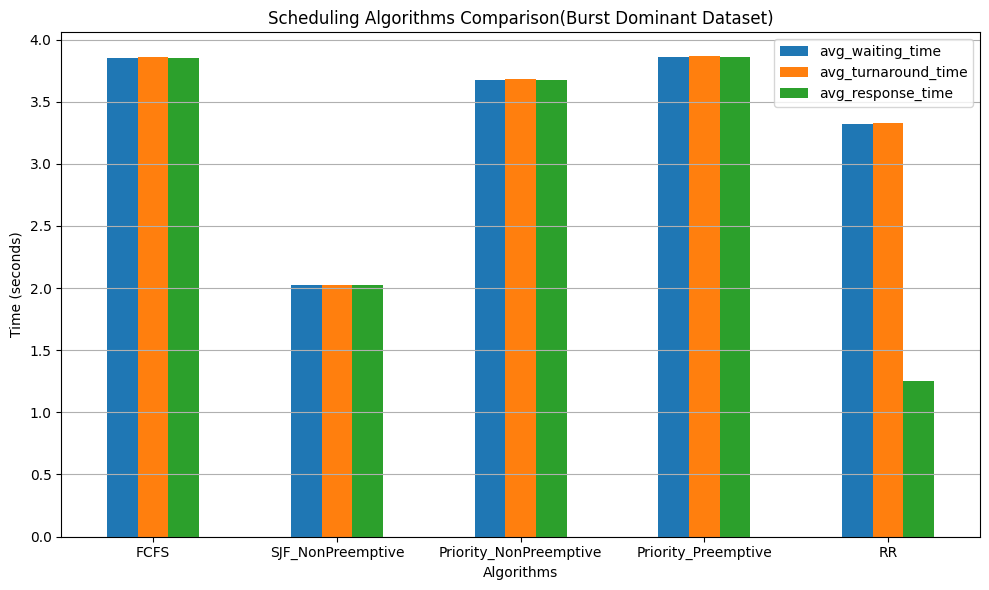

In [ ]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Add algorithm directories to path
sys.path.append(os.path.relpath("First-Come-First-Serve-scheduling"))
sys.path.append(os.path.relpath("Priority-Scheduling"))
sys.path.append(os.path.relpath("Round-Robin-scheduling"))
sys.path.append(os.path.relpath("Shortest-Job-First-scheduling"))

# Import scheduling functions
from FCFS import simulate_fcfs_algorithm
from RR import simulate_rr_algorithm
from SJF_np import simulate_sjf_np_algorithm
from priority_np import simulate_priority_np_algorithm
from priority_p import simulate_priority_p_algorithm


def main():
    # Load dataset
    try:
        csv_path = os.path.join(os.path.dirname(__file__), "db", "burst_dominant_dataset.csv")
    except NameError:
        csv_path = os.path.join(os.getcwd(), "db", "burst_dominant_dataset.csv")

    try:
        data = pd.read_csv(csv_path)
    except FileNotFoundError:
        print(f"❌ CSV file not found at {csv_path}")
        return

    # Prepare storage for metrics
    awt_arr, att_arr, art_arr = [], [], []
    results = {}

    # Define algorithms to run
    algos = [
        ("FCFS", simulate_fcfs_algorithm),
        ("SJF_NonPreemptive", simulate_sjf_np_algorithm),
        ("Priority_NonPreemptive", simulate_priority_np_algorithm),
        ("Priority_Preemptive", simulate_priority_p_algorithm),
        ("RR", simulate_rr_algorithm)
    ]

    # Run each algorithm and collect results
    for name, func in algos:
        if name == "RR":
            result = func(data, 1)  # time quantum = 1
        else:
            result = func(data)
        results[name] = result
        awt_arr.append(float(result['awt']))
        att_arr.append(float(result['att']))
        art_arr.append(float(result['art']))

        # Print detailed results
        print(f"=== {name} ===")
        print(f"Number of processes   = {result['n']}")
        print(f"Throughput            = {result['throughput']}")
        print(f"CPU utilization       = {result['cpu_util']}")
        print(f"Average waiting time  = {result['awt']}")
        print(f"Average turnaround    = {result['att']}")
        print(f"Average response time = {result['art']}\n")

    # Create summary DataFrame
    df = pd.DataFrame(
        {
            'avg_waiting_time':    awt_arr,
            'avg_turnaround_time': att_arr,
            'avg_response_time':   art_arr
        },
        index=[name for name, _ in algos]
    )

    # Display summary
    print("=== Summary DataFrame ===")
    print(df)

    # Plot bar chart
    df.plot.bar(rot=0, figsize=(10, 6))
    plt.title('Scheduling Algorithms Comparison(Burst Dominant Dataset)')
    plt.xlabel('Algorithms')
    plt.ylabel('Time (seconds)')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

FCFS algorithm results:
Throughput = 90.8029
CPU utilization = 0.91
Average waiting time = 12.4669
Average turn around time = 12.4769
Average response time = 12.4669 

=== FCFS ===
Number of processes   = 2500
Throughput            = 90.8029
CPU utilization       = 0.91
Average waiting time  = 12.4669
Average turnaround    = 12.4769
Average response time = 12.4669

SJF non preemptive algorithm results:
Throughput = 100.2019
CPU utilization = 0.9999983957673927
Average waiting time = 11.478203
Average turn around time = 11.488183
Average response time = 11.478203

=== SJF_NonPreemptive ===
Number of processes   = 2500
Throughput            = 100.2019
CPU utilization       = 1.00
Average waiting time  = 11.4782
Average turnaround    = 11.4882
Average response time = 11.4782

Priority non preemptive algorithm results: 
Throughput = 100.2019
CPU utilization = 0.9999983957673927
Average waiting time = 12.40
Average turn around time = 12.41
Average response time = 12.40

=== Priority_NonPree

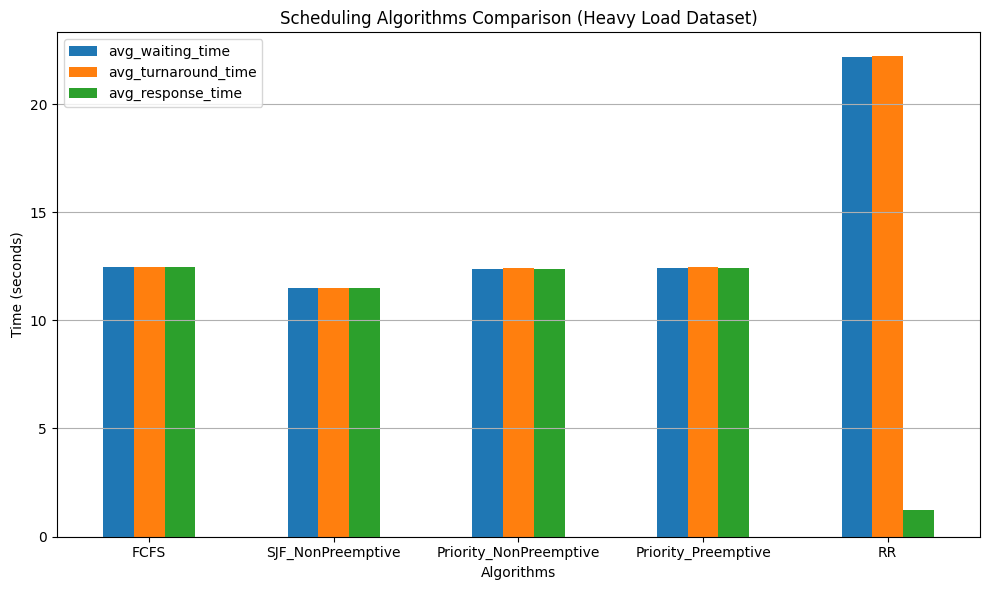

In [ ]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Add algorithm directories to path
sys.path.append(os.path.relpath("First-Come-First-Serve-scheduling"))
sys.path.append(os.path.relpath("Priority-Scheduling"))
sys.path.append(os.path.relpath("Round-Robin-scheduling"))
sys.path.append(os.path.relpath("Shortest-Job-First-scheduling"))

# Import scheduling functions
from FCFS import simulate_fcfs_algorithm
from RR import simulate_rr_algorithm
from SJF_np import simulate_sjf_np_algorithm
from priority_np import simulate_priority_np_algorithm
from priority_p import simulate_priority_p_algorithm


def main():
    # Load dataset
    try:
        csv_path = os.path.join(os.path.dirname(__file__), "db", "heavy_load_dataset.csv")
    except NameError:
        csv_path = os.path.join(os.getcwd(), "db", "heavy_load_dataset.csv")

    try:
        data = pd.read_csv(csv_path)
    except FileNotFoundError:
        print(f"❌ CSV file not found at {csv_path}")
        return

    # Prepare storage for metrics
    awt_arr, att_arr, art_arr = [], [], []
    results = {}

    # Define algorithms to run
    algos = [
        ("FCFS", simulate_fcfs_algorithm),
        ("SJF_NonPreemptive", simulate_sjf_np_algorithm),
        ("Priority_NonPreemptive", simulate_priority_np_algorithm),
        ("Priority_Preemptive", simulate_priority_p_algorithm),
        ("RR", simulate_rr_algorithm)
    ]

    # Run each algorithm and collect results
    for name, func in algos:
        if name == "RR":
            result = func(data, 1)  # time quantum = 1
        else:
            result = func(data)
        results[name] = result
        awt_arr.append(float(result['awt']))
        att_arr.append(float(result['att']))
        art_arr.append(float(result['art']))

        # Print detailed results
        print(f"=== {name} ===")
        print(f"Number of processes   = {result['n']}")
        print(f"Throughput            = {result['throughput']}")
        print(f"CPU utilization       = {result['cpu_util']}")
        print(f"Average waiting time  = {result['awt']}")
        print(f"Average turnaround    = {result['att']}")
        print(f"Average response time = {result['art']}\n")

    # Create summary DataFrame
    df = pd.DataFrame(
        {
            'avg_waiting_time':    awt_arr,
            'avg_turnaround_time': att_arr,
            'avg_response_time':   art_arr
        },
        index=[name for name, _ in algos]
    )

    # Display summary
    print("=== Summary DataFrame ===")
    print(df)

    # Plot bar chart
    df.plot.bar(rot=0, figsize=(10, 6))
    plt.title('Scheduling Algorithms Comparison (Heavy Load Dataset)')
    plt.xlabel('Algorithms')
    plt.ylabel('Time (seconds)')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

FCFS algorithm results:
Throughput = 87.7293
CPU utilization = 0.91
Average waiting time = 12.7371
Average turn around time = 12.7474
Average response time = 12.7371 

=== FCFS ===
Number of processes   = 2500
Throughput            = 87.7293
CPU utilization       = 0.91
Average waiting time  = 12.7371
Average turnaround    = 12.7474
Average response time = 12.7371

SJF non preemptive algorithm results:
Throughput = 96.7411
CPU utilization = 0.9999984511756351
Average waiting time = 8.696614
Average turn around time = 8.706951
Average response time = 8.696614

=== SJF_NonPreemptive ===
Number of processes   = 2500
Throughput            = 96.7411
CPU utilization       = 1.00
Average waiting time  = 8.6966
Average turnaround    = 8.7070
Average response time = 8.6966

Priority non preemptive algorithm results: 
Throughput = 96.7411
CPU utilization = 0.9999984511756351
Average waiting time = 12.04
Average turn around time = 12.05
Average response time = 12.04

=== Priority_NonPreemptive ==

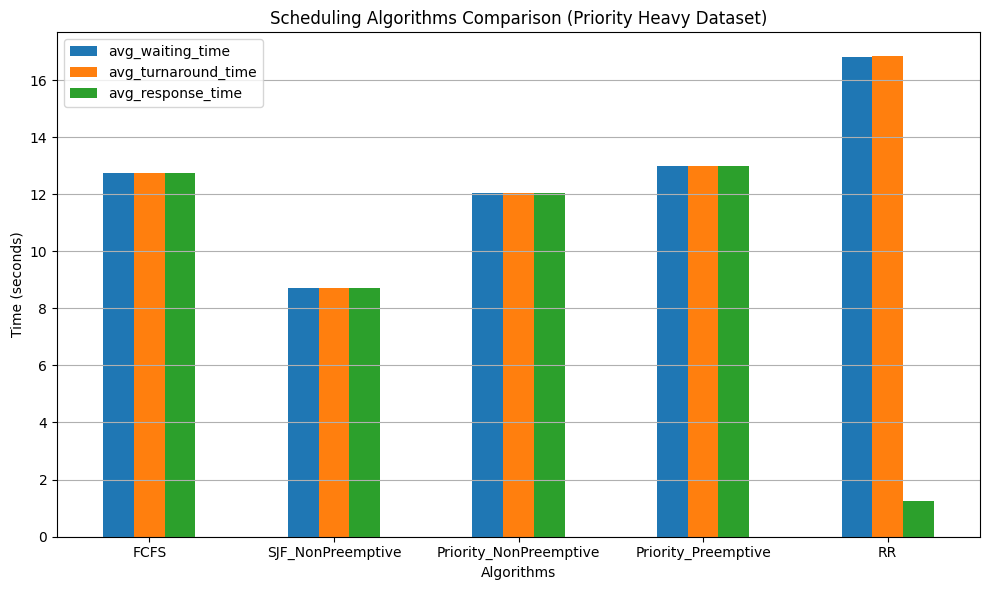

In [ ]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Add algorithm directories to path
sys.path.append(os.path.relpath("First-Come-First-Serve-scheduling"))
sys.path.append(os.path.relpath("Priority-Scheduling"))
sys.path.append(os.path.relpath("Round-Robin-scheduling"))
sys.path.append(os.path.relpath("Shortest-Job-First-scheduling"))

# Import scheduling functions
from FCFS import simulate_fcfs_algorithm
from RR import simulate_rr_algorithm
from SJF_np import simulate_sjf_np_algorithm
from priority_np import simulate_priority_np_algorithm
from priority_p import simulate_priority_p_algorithm


def main():
    # Load dataset
    try:
        csv_path = os.path.join(os.path.dirname(__file__), "db", "priority_heavy_dataset.csv")
    except NameError:
        csv_path = os.path.join(os.getcwd(), "db", "priority_heavy_dataset.csv")

    try:
        data = pd.read_csv(csv_path)
    except FileNotFoundError:
        print(f"❌ CSV file not found at {csv_path}")
        return

    # Prepare storage for metrics
    awt_arr, att_arr, art_arr = [], [], []
    results = {}

    # Define algorithms to run
    algos = [
        ("FCFS", simulate_fcfs_algorithm),
        ("SJF_NonPreemptive", simulate_sjf_np_algorithm),
        ("Priority_NonPreemptive", simulate_priority_np_algorithm),
        ("Priority_Preemptive", simulate_priority_p_algorithm),
        ("RR", simulate_rr_algorithm)
    ]

    # Run each algorithm and collect results
    for name, func in algos:
        if name == "RR":
            result = func(data, 1)  # time quantum = 1
        else:
            result = func(data)
        results[name] = result
        awt_arr.append(float(result['awt']))
        att_arr.append(float(result['att']))
        art_arr.append(float(result['art']))

        # Print detailed results
        print(f"=== {name} ===")
        print(f"Number of processes   = {result['n']}")
        print(f"Throughput            = {result['throughput']}")
        print(f"CPU utilization       = {result['cpu_util']}")
        print(f"Average waiting time  = {result['awt']}")
        print(f"Average turnaround    = {result['att']}")
        print(f"Average response time = {result['art']}\n")

    # Create summary DataFrame
    df = pd.DataFrame(
        {
            'avg_waiting_time':    awt_arr,
            'avg_turnaround_time': att_arr,
            'avg_response_time':   art_arr
        },
        index=[name for name, _ in algos]
    )

    # Display summary
    print("=== Summary DataFrame ===")
    print(df)

    # Plot bar chart
    df.plot.bar(rot=0, figsize=(10, 6))
    plt.title('Scheduling Algorithms Comparison (Priority Heavy Dataset)')
    plt.xlabel('Algorithms')
    plt.ylabel('Time (seconds)')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

In [ ]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Add algorithm directories to path
sys.path.append(os.path.relpath("First-Come-First-Serve-scheduling"))
sys.path.append(os.path.relpath("Priority-Scheduling"))
sys.path.append(os.path.relpath("Round-Robin-scheduling"))
sys.path.append(os.path.relpath("Shortest-Job-First-scheduling"))

# Import scheduling functions
from FCFS import simulate_fcfs_algorithm
from RR import simulate_rr_algorithm
from SJF_np import simulate_sjf_np_algorithm
from priority_np import simulate_priority_np_algorithm
from priority_p import simulate_priority_p_algorithm


def main():
    # Load dataset
    try:
        csv_path = os.path.join(os.path.dirname(__file__), "db", "preemption_strength_dataset.csv")
    except NameError:
        csv_path = os.path.join(os.getcwd(), "db", "preemption_strength_dataset.csv")

    try:
        data = pd.read_csv(csv_path)
    except FileNotFoundError:
        print(f"❌ CSV file not found at {csv_path}")
        return

    # Prepare storage for metrics
    awt_arr, att_arr, art_arr = [], [], []
    results = {}

    # Define algorithms to run
    algos = [
        ("FCFS", simulate_fcfs_algorithm),
        ("SJF_NonPreemptive", simulate_sjf_np_algorithm),
        ("Priority_NonPreemptive", simulate_priority_np_algorithm),
        ("Priority_Preemptive", simulate_priority_p_algorithm),
        ("RR", simulate_rr_algorithm)
    ]

    # Run each algorithm and collect results
    for name, func in algos:
        if name == "RR":
            result = func(data, 1)  # time quantum = 1
        else:
            result = func(data)
        results[name] = result
        awt_arr.append(float(result['awt']))
        att_arr.append(float(result['att']))
        art_arr.append(float(result['art']))

        # Print detailed results
        print(f"=== {name} ===")
        print(f"Number of processes   = {result['n']}")
        print(f"Throughput            = {result['throughput']}")
        print(f"CPU utilization       = {result['cpu_util']}")
        print(f"Average waiting time  = {result['awt']}")
        print(f"Average turnaround    = {result['att']}")
        print(f"Average response time = {result['art']}\n")

    # Create summary DataFrame
    df = pd.DataFrame(
        {
            'avg_waiting_time':    awt_arr,
            'avg_turnaround_time': att_arr,
            'avg_response_time':   art_arr
        },
        index=[name for name, _ in algos]
    )

    # Display summary
    print("=== Summary DataFrame ===")
    print(df)

    # Plot bar chart
    df.plot.bar(rot=0, figsize=(10, 6))
    plt.title('Scheduling Algorithms Comparison (Priority Heavy Dataset)')
    plt.xlabel('Algorithms')
    plt.ylabel('Time (seconds)')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

In [ ]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Add algorithm directories to path
sys.path.append(os.path.relpath("First-Come-First-Serve-scheduling"))
sys.path.append(os.path.relpath("Priority-Scheduling"))
sys.path.append(os.path.relpath("Round-Robin-scheduling"))
sys.path.append(os.path.relpath("Shortest-Job-First-scheduling"))

# Import scheduling functions
from FCFS import simulate_fcfs_algorithm
from RR import simulate_rr_algorithm
from SJF_np import simulate_sjf_np_algorithm
from priority_np import simulate_priority_np_algorithm
from priority_p import simulate_priority_p_algorithm


def main():
    # Load dataset
    try:
        csv_path = os.path.join(os.path.dirname(__file__), "db", "preemption_weakness_dataset.csv")
    except NameError:
        csv_path = os.path.join(os.getcwd(), "db", "preemption_weakness_dataset.csv")

    try:
        data = pd.read_csv(csv_path)
    except FileNotFoundError:
        print(f"❌ CSV file not found at {csv_path}")
        return

    # Prepare storage for metrics
    awt_arr, att_arr, art_arr = [], [], []
    results = {}

    # Define algorithms to run
    algos = [
        ("FCFS", simulate_fcfs_algorithm),
        ("SJF_NonPreemptive", simulate_sjf_np_algorithm),
        ("Priority_NonPreemptive", simulate_priority_np_algorithm),
        ("Priority_Preemptive", simulate_priority_p_algorithm),
        ("RR", simulate_rr_algorithm)
    ]

    # Run each algorithm and collect results
    for name, func in algos:
        if name == "RR":
            result = func(data, 1)  # time quantum = 1
        else:
            result = func(data)
        results[name] = result
        awt_arr.append(float(result['awt']))
        att_arr.append(float(result['att']))
        art_arr.append(float(result['art']))

        # Print detailed results
        print(f"=== {name} ===")
        print(f"Number of processes   = {result['n']}")
        print(f"Throughput            = {result['throughput']}")
        print(f"CPU utilization       = {result['cpu_util']}")
        print(f"Average waiting time  = {result['awt']}")
        print(f"Average turnaround    = {result['att']}")
        print(f"Average response time = {result['art']}\n")

    # Create summary DataFrame
    df = pd.DataFrame(
        {
            'avg_waiting_time':    awt_arr,
            'avg_turnaround_time': att_arr,
            'avg_response_time':   art_arr
        },
        index=[name for name, _ in algos]
    )

    # Display summary
    print("=== Summary DataFrame ===")
    print(df)

    # Plot bar chart
    df.plot.bar(rot=0, figsize=(10, 6))
    plt.title('Scheduling Algorithms Comparison (Priority Heavy Dataset)')
    plt.xlabel('Algorithms')
    plt.ylabel('Time (seconds)')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()